In [1]:
# ~~~~~~~~~~~~~~~~
# PyTorch Model

import torch
import yaml
from models.decoder import architectures

with open("models/decoder/decoder_params.yaml") as file:
    params = yaml.safe_load(file)

model = architectures.LightningNet(params["inner_dims"], params["seq_len"], params["learning_rate"])
model.load_state_dict(torch.load("models/decoder/decoder.pth"))
model.eval();

model_denoise = architectures.LightningNet(params["inner_dims"], params["seq_len"], params["learning_rate"])
model_denoise.load_state_dict(torch.load("models/decoder/decoder_denoise.pth"))
model_denoise.eval();

# ~~~~~~~~~~~~~~~~
# Kernel DM+V

from models.kernel_dmv.my_kernel_dmv import KernelDMV
kdm = KernelDMV()

# ~~~~~~~~~~~~~~~~
# GMRF

from models.gmrf.my_gmrf import myGMRF
gmrf = myGMRF()

In [2]:
from torch.utils import data
from data.gdm_realdataset import RealGasDataSet

dataset = RealGasDataSet("data/6x5_realData/02apr.pt")
loader = data.DataLoader(dataset, batch_size=1, shuffle=True, drop_last=True)
data_iter = iter(loader)

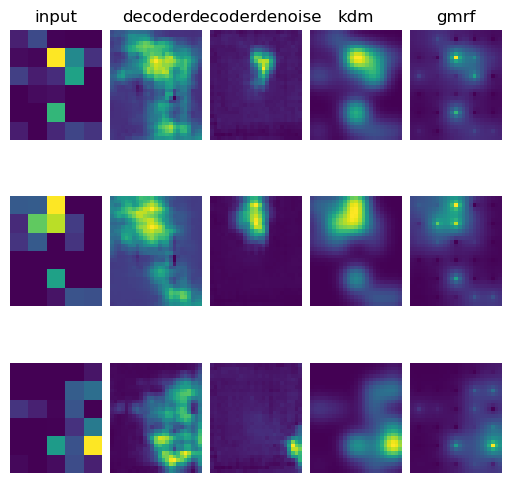

In [5]:
from utils import plot_dict

X_list = [data_iter.next(), data_iter.next(), data_iter.next()]

data = {
        "input": X_list,
        "decoder": [model(x.squeeze(1)) for x in X_list],
        "decoderdenoise": [model_denoise(x.squeeze(1)) for x in X_list],
        "kdm": [kdm.calculate(x.squeeze()) for x in X_list],
        "gmrf": [gmrf.calculate(x.squeeze()) for x in X_list],
        }

fig, axes = plot_dict(data, [5,5]);